In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import  mean_squared_log_error

sns.set() # Definir o tema do Matplotlib como sendo o tema padrão do Seaborn

In [35]:
df=pd.read_csv('../datasets/credit.csv')

In [36]:
df.head()

,Limit,Score
0,3606,283
1,6645,483
2,7075,514
3,9504,681
4,4897,357


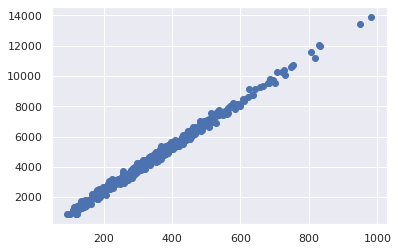

In [56]:
plt.scatter(data=df,x='Score',y='Limit')


In [38]:
pearsonr(x=df['Score'],y=df['Limit'])

(0.9968797370016828, 0.0)

### Scikit Learn

In [39]:
lr=LinearRegression()
X=df['Score'].values
y=df['Limit'].values
lr=LinearRegression() 
lr.fit(X.reshape(-1, 1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lr.intercept_ #b_0

-542.9282299869001

In [41]:
lr.coef_ #b_1 coeficiente angular da reta

array([14.87160712])

In [42]:
lr.score(X.reshape(-1,1),y)

0.9937692100445441

In [43]:
y_pred=lr.predict(X.reshape(-1,1)) # Valores estimados a partir da reta de regressão

### Statsmodels

In [44]:
x = sm.add_constant(X)

model = sm.OLS(y,x).fit() 

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:23:20   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -542.9282     22.850    -23.760      0.000    -587.851    -498.006
x1            14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

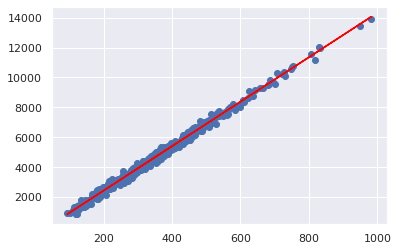

In [58]:
plt.scatter(data=df,x='Score',y='Limit')
plt.plot(X,y_pred,color='red')

## Características dos Resíduos (Erros da regressão)

#### 1. Não devem ser correlacionados

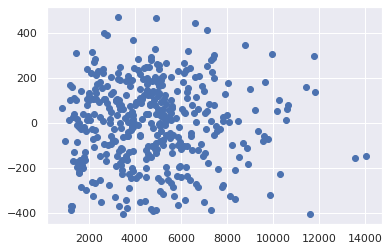

In [46]:
plt.scatter(y_pred,model.resid)


### 2. Ter média zero

In [47]:
model.resid.mean()

-2.6147972675971685e-13

### 4. Distribuição normal dos resíduos

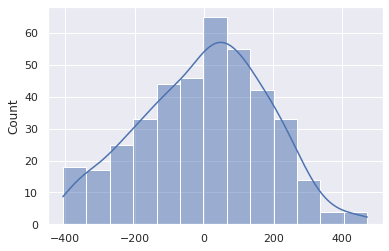

In [48]:
sns.histplot(x=model.resid, kde=True)

## Métricas para Análise dos Erros

### 1. R-Quadrado ($R^2$)

In [49]:
r2_score(y,y_pred)

0.9937692100445441

### 2. MAE

In [50]:
mean_absolute_error(y,y_pred)

148.1136168180826

### 3. MSE

In [51]:
mean_squared_error(y,y_pred)

33113.29934556935

### 4. RMSE

In [52]:
np.sqrt(mean_squared_error(y,y_pred))

181.97060022313866

### 5. RMSLE

In [53]:
mean_squared_log_error(y,y_pred)

0.003740332083736051

In [54]:
np.sqrt(mean_squared_log_error(y,y_pred))

0.06115825442028289